In [2]:
# random distribution
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

SUM_MONEY = 8624197000000 # Ref: NESDC
POPULATION = 69688000 # Ref: DOPA
SIZE = 1000000
FACTOR = 10 / 5.64

WEALTHY_1 = 0.031103 # Ref: RD 2014 (rescaled)
WEALTHY_2 = 0.012947 # Ref: RD 2014
WEALTHY_3 = 0.027364 # Ref: RD 2014
WEALTHY_4 = 0.018227 # Ref: RD 2014
WEALTHY_5 = 0.034090 # Ref: RD 2014
WEALTHY_6 = 0.047334 # Ref: RD 2014
WEALTHY_7 = 0.062946 # Ref: RD 2014

PERCENT_1 = 0.000341 # Ref: RD 2014 (rescaled)
PERCENT_2 = 0.000568 # Ref: RD 2014
PERCENT_3 = 0.002273 # Ref: RD 2014
PERCENT_4 = 0.002273 # Ref: RD 2014
PERCENT_5 = 0.005682 # Ref: RD 2014
PERCENT_6 = 0.011136 # Ref: RD 2014
PERCENT_7 = 0.022727 # Ref: RD 2014

WEALTHY_20 = 0.492301 # Ref: NESDC 2021
WEALTHY_40 = 0.213851 # Ref: NESDC 2021
WEALTHY_60 = 0.141804 # Ref: NESDC 2021
WEALTHY_80 = 0.097006 # Ref: NESDC 2021
weight = POPULATION / SIZE
NO_INCOME = 200000 / POPULATION
ITERATION = 1

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Total Income    8,624,197 M฿/year
Average Income  10,312.87 ฿/month
Median Income   7,258.40 ฿/month

Gini
Actual          0.430
Simulated       0.430

Real Income Distribution (Ref: NESDC, 2021):
2,838; 5,002; 7,312; 11,027; 25,385 ฿/month (Quintile)

Simulated Income Distribution
-------------------------------------------------------------------------------------------------------------------------------------------------------
| Percentile    | Min (฿/month)              | Max (฿/month)                  | Avg (฿/month)              | Percent Shared             | Population  |
-------------------------------------------------------------------------------------------------------------------------------------------------------
| 0-10 %        | 0.00                       | 2,860.44                       | 2,570.66                   | 2.49%                      | 6,968,800   |
| 10-20 %       | 2,860.47                   | 4,683.93                       | 3,105.38                   | 

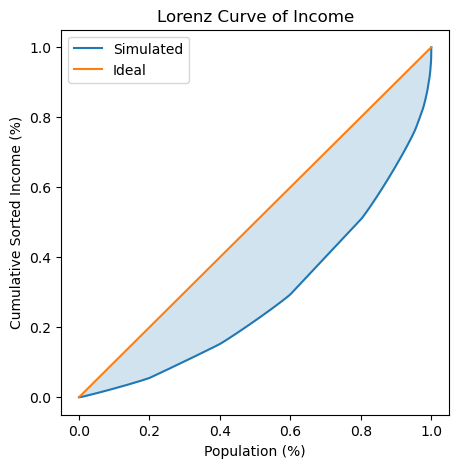

In [6]:
rand_arrays = []
cumus = []

def min_reduced(array):
    return array - min(array)

for _ in tqdm(range(ITERATION)):
    pre_rand_array_100 = min_reduced(np.array(list(np.random.lognormal(mean = 5, sigma = 0.1, size = int((0.2 - NO_INCOME) * SIZE))) + [0] * int(NO_INCOME * SIZE)))
    pre_rand_array_80 = min_reduced(np.random.lognormal(mean = 5, sigma = 0.2, size = int(0.2 * SIZE)))
    pre_rand_array_60 = min_reduced(np.random.lognormal(mean = 5, sigma = 0.2, size = int(0.2 * SIZE)))
    pre_rand_array_40 = min_reduced(np.random.lognormal(mean = 5, sigma = 0.05, size = int(0.2 * SIZE)))
    pre_rand_array_20 = min_reduced(np.random.lognormal(mean = 5, sigma = .2, size = int((0.2 - PERCENT_7 - PERCENT_6 - PERCENT_5 - PERCENT_4 - PERCENT_3 - PERCENT_2 - PERCENT_1) * SIZE)))

    pre_rand_array_7 = min_reduced(np.random.lognormal(mean = 5, sigma = .1, size = int(PERCENT_7 * SIZE)))
    pre_rand_array_6 = min_reduced(np.random.lognormal(mean = 5, sigma = .1, size = int(PERCENT_6 * SIZE)))
    pre_rand_array_5 = min_reduced(np.random.lognormal(mean = 5, sigma = .2, size = int(PERCENT_5 * SIZE)))
    pre_rand_array_4 = min_reduced(np.random.lognormal(mean = 5, sigma = .3, size = int(PERCENT_4 * SIZE)))
    pre_rand_array_3 = min_reduced(np.random.lognormal(mean = 5, sigma = .4, size = int(PERCENT_3 * SIZE)))
    pre_rand_array_2 = min_reduced(np.random.lognormal(mean = 5, sigma = .5, size = int(PERCENT_2 * SIZE)))
    pre_rand_array_1 = min_reduced(np.random.lognormal(mean = 5, sigma = 20, size = int(PERCENT_1 * SIZE)))

    rand_arrays.append(rand_array := np.array(
        (array_100 := list(pre_rand_array_100 / sum(pre_rand_array_100) * (1 - (WEALTHY_80 + WEALTHY_60 + WEALTHY_40 + WEALTHY_20)))) +
        (array_80 := list(pre_rand_array_80 / sum(pre_rand_array_80) * (WEALTHY_80 - max(array_100) * len(pre_rand_array_80)) + max(array_100))) +
        (array_60 := list(pre_rand_array_60 / sum(pre_rand_array_60) * (WEALTHY_60 - max(array_80) * len(pre_rand_array_60)) + max(array_80))) +
        (array_40 := list(pre_rand_array_40 / sum(pre_rand_array_40) * (WEALTHY_40 - max(array_60) * len(pre_rand_array_40)) + max(array_60))) +
        (array_20 := list(pre_rand_array_20 / sum(pre_rand_array_20) * (
            WEALTHY_20 - WEALTHY_1 - WEALTHY_2 - WEALTHY_3 - WEALTHY_4 - WEALTHY_5 - WEALTHY_6 - WEALTHY_7 - max(array_40) * len(pre_rand_array_20)) + max(array_40))) +
        (array_7 := list(pre_rand_array_7 / sum(pre_rand_array_7) * (WEALTHY_7 - max(array_20) * len(pre_rand_array_7)) + max(array_20))) +
        (array_6 := list(pre_rand_array_6 / sum(pre_rand_array_6) * (WEALTHY_6 - max(array_7) * len(pre_rand_array_6)) + max(array_7))) +
        (array_5 := list(pre_rand_array_5 / sum(pre_rand_array_5) * (WEALTHY_5 - max(array_6) * len(pre_rand_array_5)) + max(array_6))) +
        (array_4 := list(pre_rand_array_4 / sum(pre_rand_array_4) * (WEALTHY_4 - max(array_5) * len(pre_rand_array_4)) + max(array_5))) +
        (array_3 := list(pre_rand_array_3 / sum(pre_rand_array_3) * (WEALTHY_3 - max(array_4) * len(pre_rand_array_3)) + max(array_4))) +
        (array_2 := list(pre_rand_array_2 / sum(pre_rand_array_2) * (WEALTHY_2 - max(array_3) * len(pre_rand_array_2)) + max(array_3))) +
        (array_1 := list(pre_rand_array_1 / sum(pre_rand_array_1) * (WEALTHY_1 - max(array_2) * len(pre_rand_array_1)) + max(array_2)))
    ))
    cumus.append(np.cumsum(np.sort(rand_array)) / sum(rand_array))

def income(x):
    income_list = []
    for rand_array in rand_arrays:
        income_list.append(np.sort(rand_array)[
            -1 if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)) - 1] / sum(rand_array) * SUM_MONEY / weight / 12)
    return np.mean(income_list), np.std(income_list)

def average(x, y):
    average_list = []
    for rand_array in rand_arrays:
        average_list.append(np.mean(np.sort(rand_array)[
            None if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)):
            None if y == 1
            else 0 if y == 0
            else round(y * len(rand_array))] / sum(rand_array) * SUM_MONEY / weight / 12))
    return np.mean(average_list), np.std(average_list)

def sum_range(x, y):
    sum_range_list = []
    for rand_array in rand_arrays:
        sum_range_list.append(sum(np.sort(rand_array)[
            None if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)):
            None if y == 1
            else 0 if y == 0
            else round(y * len(rand_array))]) / sum(rand_array) * 100)
    return np.mean(sum_range_list), np.std(sum_range_list)

def range_gini(x, y):
    print(
        f"| {x}-{y} %", " " * (9 - len(str(x)) - len(str(y))),
        "|", f"{income(x/100 + 0.00001)[0]:,.2f}", " " * (25 - len(f"{income(x/100 + 0.00001)[0]:,.2f}")),
        "|", f"{income(y/100)[0]:,.2f}", " " * (29 - len(f"{income(y/100)[0]:,.2f}")),
        "|", f"{average(x/100, y/100)[0]:,.2f}", " " * (25 - len(f"{average(x/100, y/100)[0]:,.2f}")),
        "|", f"{sum_range(x/100, y/100)[0]:.2f}%", " " * (25 - len(f"{sum_range(x/100, y/100)[0]:.2f}%")),
        "|", f"{(y - x) / 100 * POPULATION :,.0f}", " " * (10 - len(f"{(y - x) / 100 * POPULATION :,.0f}")), "|"
    )

print("Total Income  ", f"{SUM_MONEY/1000000: ,.0f} M฿/year")
print("Average Income", f"{SUM_MONEY / POPULATION / 12: ,.2f} ฿/month")
print("Median Income ", f"{income(0.5)[0]: ,.2f} ฿/month")
print("\nGini")
print("Actual          0.430")
print("Simulated      ",
      f"{np.mean(1 - 2 * np.sum(1/len(rand_arrays[0]) * np.array(cumus), axis = 1)):.3f}\n")

print("Real Income Distribution (Ref: NESDC, 2021):\n2,838; 5,002; 7,312; 11,027; 25,385 ฿/month (Quintile)\n")

print("Simulated Income Distribution")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
print("| Percentile    | Min (฿/month)              | Max (฿/month)                  | Avg (฿/month)              | Percent Shared             | Population  |")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
range_gini(0, 10)
range_gini(10, 20)
range_gini(20, 30)
range_gini(30, 40)
range_gini(40, 50)
range_gini(50, 60)
range_gini(60, 70)
range_gini(70, 80)
range_gini(80, 90)
range_gini(90, 100)
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
range_gini(80, 95)
range_gini(95, 97.75)
range_gini(97.75, 99)
range_gini(99, 99.5)
range_gini(99.5, 99.9)
range_gini(99.9, 99.95)
range_gini(99.95, 100)
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

plt.figure(figsize = (5, 5))
plt.plot(np.linspace(0, 1, len(rand_arrays[0])), np.mean(cumus, axis = 0))
plt.plot(np.linspace(0, 1, len(rand_arrays[0])), np.linspace(0, 1, len(rand_arrays[0])))
plt.fill_between(
    np.linspace(0, 1, len(rand_arrays[0])),
    np.mean(cumus, axis = 0),
    np.linspace(0, 1, len(rand_arrays[0])), alpha = 0.2
)
plt.legend(["Simulated", "Ideal"])
plt.xlabel("Population (%)")
plt.ylabel("Cumulative Sorted Income (%)")
plt.title("Lorenz Curve of Income")
plt.show()

100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Total Income    8,624,197 M฿/year
Average Income  10,312.87 ฿/month
Median Income   7,416.85 ฿/month

Gini
Actual          0.430
Simulated       0.430

Real Income Distribution (Ref: NESDC, 2021):
2,838; 5,002; 7,312; 11,027; 25,385 ฿/month (Quintile)

Simulated Income Distribution
-------------------------------------------------------------------------------------------------------------------------------------------------------
| Percentile    | Min (฿/month)              | Max (฿/month)                  | Avg (฿/month)              | Percent Shared             | Population  |
-------------------------------------------------------------------------------------------------------------------------------------------------------
| 0-10 %        | 0.00                       | 3,007.27                       | 2,139.98                   | 2.08%                      | 6,968,800   |
| 10-20 %       | 3,007.42                   | 4,132.18                       | 3,588.13                   | 

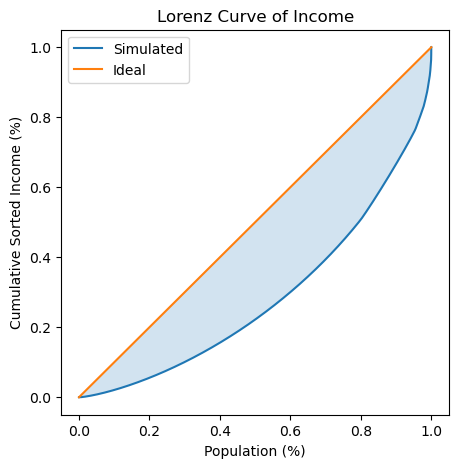

In [3]:
# random distribution
WEALTHY_80_2 = 0.507699 # Ref: NESDC 2021

rand_arrays_2 = []
cumus_2 = []

def min_reduced(array):
    return array - min(array)

for _ in tqdm(range(ITERATION)):
    pre_rand_array_2_80 = list(min_reduced(sorted(np.random.lognormal(mean = 1, sigma = 0.655, size = int(SIZE)))[:int((0.8 - NO_INCOME)* SIZE)])) + [0] * int(NO_INCOME * SIZE)
    pre_rand_array_2_20 = min_reduced(np.random.lognormal(mean = 5, sigma = .2, size = int((0.2 - PERCENT_7 - PERCENT_6 - PERCENT_5 - PERCENT_4 - PERCENT_3 - PERCENT_2 - PERCENT_1) * SIZE)))

    pre_rand_array_2_7 = min_reduced(np.random.lognormal(mean = 5, sigma = .1, size = int(PERCENT_7 * SIZE)))
    pre_rand_array_2_6 = min_reduced(np.random.lognormal(mean = 5, sigma = .1, size = int(PERCENT_6 * SIZE)))
    pre_rand_array_2_5 = min_reduced(np.random.lognormal(mean = 5, sigma = .2, size = int(PERCENT_5 * SIZE)))
    pre_rand_array_2_4 = min_reduced(np.random.lognormal(mean = 5, sigma = .3, size = int(PERCENT_4 * SIZE)))
    pre_rand_array_2_3 = min_reduced(np.random.lognormal(mean = 5, sigma = .4, size = int(PERCENT_3 * SIZE)))
    pre_rand_array_2_2 = min_reduced(np.random.lognormal(mean = 5, sigma = .5, size = int(PERCENT_2 * SIZE)))
    pre_rand_array_2_1 = min_reduced(np.random.lognormal(mean = 5, sigma = 20, size = int(PERCENT_1 * SIZE)))

    rand_arrays_2.append(rand_array := np.array(
        (array_80_2 := list(pre_rand_array_2_80 / sum(pre_rand_array_2_80) * (WEALTHY_80_2))) +
        (array_20_2 := list(pre_rand_array_2_20 / sum(pre_rand_array_2_20) * (
            WEALTHY_20 - WEALTHY_1 - WEALTHY_2 - WEALTHY_3 - WEALTHY_4 - WEALTHY_5 - WEALTHY_6 - WEALTHY_7 - max(array_80_2) * len(pre_rand_array_2_20)) + max(array_80_2))) +
        (array_7_2 := list(pre_rand_array_2_7 / sum(pre_rand_array_2_7) * (WEALTHY_7 - max(array_20_2) * len(pre_rand_array_2_7)) + max(array_20_2))) +
        (array_6_2 := list(pre_rand_array_2_6 / sum(pre_rand_array_2_6) * (WEALTHY_6 - max(array_7_2) * len(pre_rand_array_2_6)) + max(array_7_2))) +
        (array_5_2 := list(pre_rand_array_2_5 / sum(pre_rand_array_2_5) * (WEALTHY_5 - max(array_6_2) * len(pre_rand_array_2_5)) + max(array_6_2))) +
        (array_4_2 := list(pre_rand_array_2_4 / sum(pre_rand_array_2_4) * (WEALTHY_4 - max(array_5_2) * len(pre_rand_array_2_4)) + max(array_5_2))) +
        (array_3_2 := list(pre_rand_array_2_3 / sum(pre_rand_array_2_3) * (WEALTHY_3 - max(array_4_2) * len(pre_rand_array_2_3)) + max(array_4_2))) +
        (array_2_2 := list(pre_rand_array_2_2 / sum(pre_rand_array_2_2) * (WEALTHY_2 - max(array_3_2) * len(pre_rand_array_2_2)) + max(array_3_2))) +
        (array_1_2 := list(pre_rand_array_2_1 / sum(pre_rand_array_2_1) * (WEALTHY_1 - max(array_2_2) * len(pre_rand_array_2_1)) + max(array_2_2)))
    ))
    cumus_2.append(np.cumsum(np.sort(rand_array)) / sum(rand_array))

def income(x):
    income_list = []
    for rand_array in rand_arrays_2:
        income_list.append(np.sort(rand_array)[
            -1 if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)) - 1] / sum(rand_array) * SUM_MONEY / weight / 12)
    return np.mean(income_list), np.std(income_list)

def average(x, y):
    average_list = []
    for rand_array in rand_arrays_2:
        average_list.append(np.mean(np.sort(rand_array)[
            None if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)):
            None if y == 1
            else 0 if y == 0
            else round(y * len(rand_array))] / sum(rand_array) * SUM_MONEY / weight / 12))
    return np.mean(average_list), np.std(average_list)

def sum_range(x, y):
    sum_range_list = []
    for rand_array in rand_arrays_2:
        sum_range_list.append(sum(np.sort(rand_array)[
            None if x == 1
            else 0 if x == 0
            else round(x * len(rand_array)):
            None if y == 1
            else 0 if y == 0
            else round(y * len(rand_array))]) / sum(rand_array) * 100)
    return np.mean(sum_range_list), np.std(sum_range_list)

def range_gini(x, y):
    print(
        f"| {x}-{y} %", " " * (9 - len(str(x)) - len(str(y))),
        "|", f"{income(x/100 + 0.00001)[0]:,.2f}", " " * (25 - len(f"{income(x/100 + 0.00001)[0]:,.2f}")),
        "|", f"{income(y/100)[0]:,.2f}", " " * (29 - len(f"{income(y/100)[0]:,.2f}")),
        "|", f"{average(x/100, y/100)[0]:,.2f}", " " * (25 - len(f"{average(x/100, y/100)[0]:,.2f}")),
        "|", f"{sum_range(x/100, y/100)[0]:.2f}%", " " * (25 - len(f"{sum_range(x/100, y/100)[0]:.2f}%")),
        "|", f"{(y - x) / 100 * POPULATION :,.0f}", " " * (10 - len(f"{(y - x) / 100 * POPULATION :,.0f}")), "|"
    )

print("Total Income  ", f"{SUM_MONEY/1000000: ,.0f} M฿/year")
print("Average Income", f"{SUM_MONEY / POPULATION / 12: ,.2f} ฿/month")
print("Median Income ", f"{income(0.5)[0]: ,.2f} ฿/month")
print("\nGini")
print("Actual          0.430")
print("Simulated      ",
      f"{np.mean(1 - 2 * np.sum(1/len(rand_arrays_2[0]) * np.array(cumus_2), axis = 1)):.3f}\n")

print("Real Income Distribution (Ref: NESDC, 2021):\n2,838; 5,002; 7,312; 11,027; 25,385 ฿/month (Quintile)\n")

print("Simulated Income Distribution")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
print("| Percentile    | Min (฿/month)              | Max (฿/month)                  | Avg (฿/month)              | Percent Shared             | Population  |")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
range_gini(0, 10)
range_gini(10, 20)
range_gini(20, 30)
range_gini(30, 40)
range_gini(40, 50)
range_gini(50, 60)
range_gini(60, 70)
range_gini(70, 80)
range_gini(80, 90)
range_gini(90, 100)
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")
range_gini(80, 95)
range_gini(95, 97.75)
range_gini(97.75, 99)
range_gini(99, 99.5)
range_gini(99.5, 99.9)
range_gini(99.9, 99.95)
range_gini(99.95, 100)
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

plt.figure(figsize = (5, 5))
plt.plot(np.linspace(0, 1, len(rand_arrays_2[0])), np.mean(cumus_2, axis = 0))
plt.plot(np.linspace(0, 1, len(rand_arrays_2[0])), np.linspace(0, 1, len(rand_arrays_2[0])))
plt.fill_between(
    np.linspace(0, 1, len(rand_arrays_2[0])),
    np.mean(cumus_2, axis = 0),
    np.linspace(0, 1, len(rand_arrays_2[0])), alpha = 0.2
)
plt.legend(["Simulated", "Ideal"])
plt.xlabel("Population (%)")
plt.ylabel("Cumulative Sorted Income (%)")
plt.title("Lorenz Curve of Income")
plt.show()

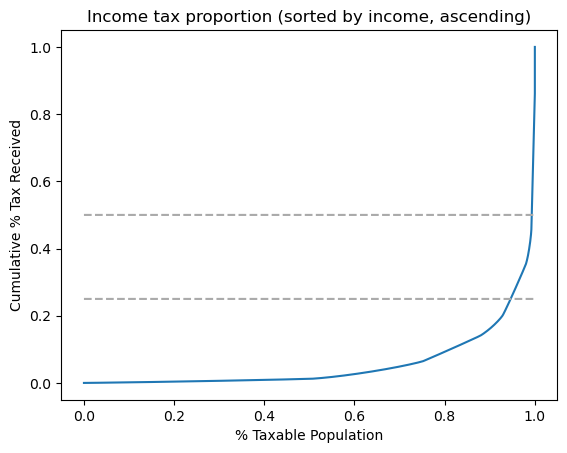

In [45]:
income_before_tax = (rand_array / sum(rand_array) * SUM_MONEY / weight) - 160000

def tax(x):
    if x <= 150000: return 0
    elif x <= 300000: return 0.05 * (x - 150000)
    elif x <= 500000: return 7500 + 0.10 * (x - 300000)
    elif x <= 750000: return 27500 + 0.15 * (x - 500000)
    elif x <= 1000000: return 65000 + 0.20 * (x - 750000)
    elif x <= 2000000: return 115000 + 0.25 * (x - 1000000)
    elif x <= 5000000: return 365000 + 0.30 * (x - 2000000)
    else: return 1265000 + 0.35 * (x - 1265000)

tax_final = sorted(list(filter(lambda x: x > 0, list(map(lambda x: float(tax(x)), income_before_tax)))))
tax_cumu = np.cumsum(tax_final) / sum(tax_final)

plt.plot(np.linspace(0, 1, len(tax_cumu)), tax_cumu)
plt.plot(np.linspace(0, 1, len(tax_cumu)), [0.25] * len(tax_cumu), c = "#AAAAAA", linestyle = "--")
plt.plot(np.linspace(0, 1, len(tax_cumu)), [0.5] * len(tax_cumu), c = "#AAAAAA", linestyle = "--")
plt.xlabel("% Taxable Population")
plt.ylabel("Cumulative % Tax Received")
plt.title("Income tax proportion (sorted by income, ascending)")
plt.show()

In [51]:
sum(tax_cumu > 0.25) / len(tax_cumu) * 100

np.float64(5.373094529132039)

# Sanity check

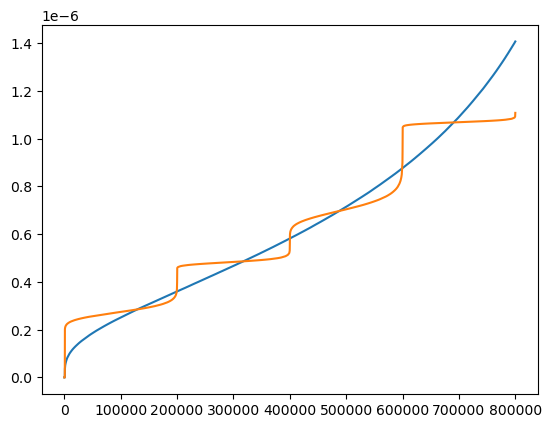

In [327]:
plt.plot(sorted(array_80_2))
plt.plot(sorted(np.concat([array_100, array_80, array_60, array_40])))
plt.show()

## Others

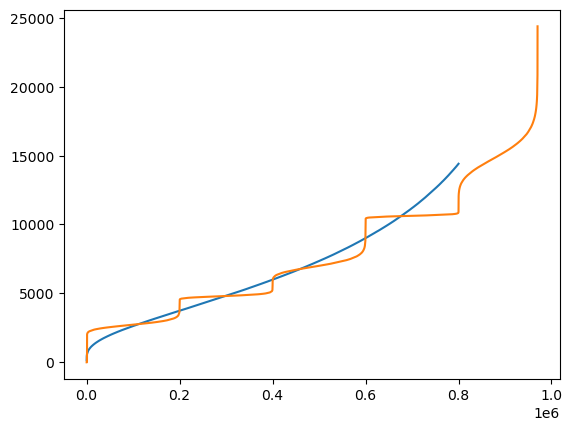

In [290]:
plt.plot(sort_80 / sum(sort_80) * 0.507 * SUM_MONEY / weight / 12)
plt.plot(sorted(np.concat([array_100, array_80, array_60, array_40, array_20])) / sum(rand_array) * SUM_MONEY / weight / 12)
plt.show()

## Taxable

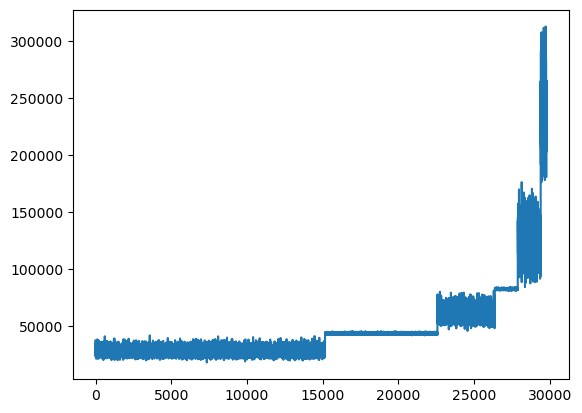

In [332]:
plt.plot(np.concat([array_7_2, array_6_2, array_5_2, array_4_2, array_3_2, array_2_2]) / sum(rand_array) * SUM_MONEY / weight / 12)
plt.show()

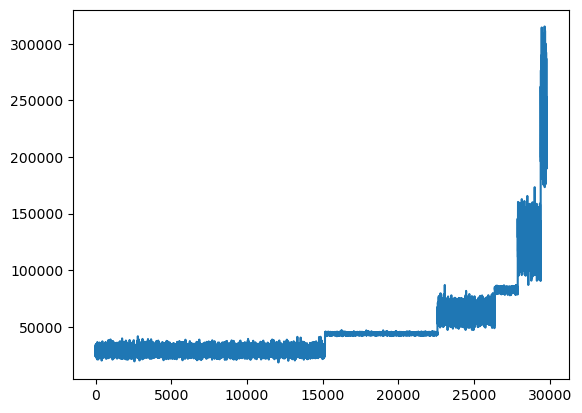

In [140]:
plt.plot(np.concat([array_7, array_6, array_5, array_4, array_3, array_2]) / sum(rand_array) * SUM_MONEY / weight / 12)
plt.show()

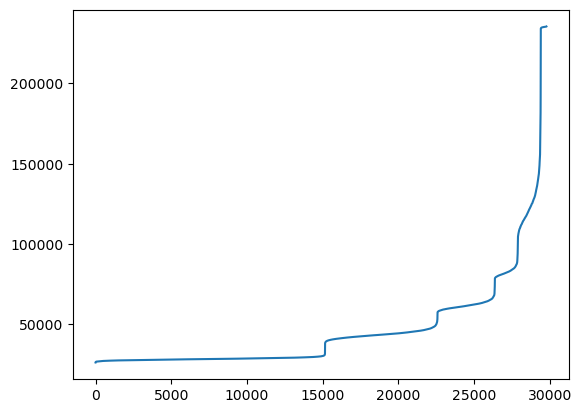

In [116]:
plt.plot(sorted(np.concat([array_7, array_6, array_5, array_4, array_3, array_2])) / sum(rand_array) * SUM_MONEY / weight / 12)
plt.show()

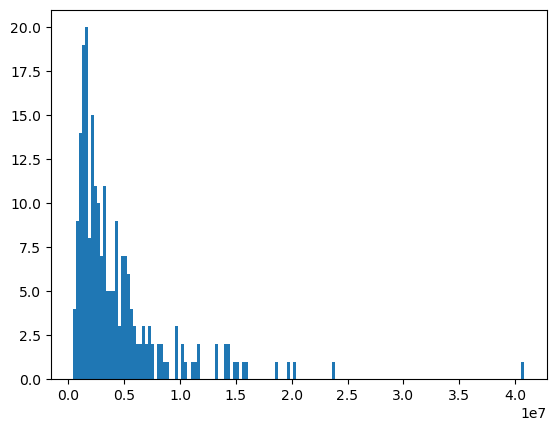

In [117]:
plt.hist(array_1 / sum(rand_array) * SUM_MONEY / weight / 12, bins = 150)
plt.show()

# Log-normal distribution

0.4284810294904804


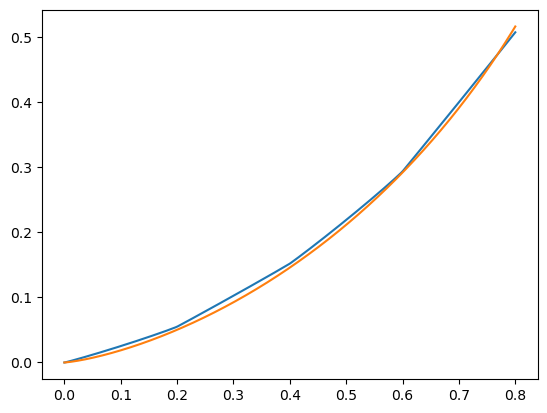

In [269]:
import numpy

sample = 1000000
sigma = 0.8

print(1 - 2 * sum(np.cumsum(sorted(rand_log := numpy.random.lognormal(mean = 1, sigma = sigma, size = sample))) / sum(rand_log) * 1/sample))

plt.plot(np.linspace(0, 0.8, int(len(rand_arrays[0]) * 0.8)), np.mean(cumus, axis = 0)[:int(len(np.mean(cumus, axis = 0)) * 0.8)])
plt.plot(np.linspace(0, 0.8, int(0.8 * sample)), np.cumsum(sorted(rand_log))[:int(len(rand_log) * 0.8)] / sum(rand_log))
plt.show()

In [265]:
min(sorted(rand_array)[:int(len(rand_array) * 0.8)] / sum(rand_array) * SUM_MONEY / weight / 12), max(sorted(rand_array)[:int(len(rand_array) * 0.8)] / sum(rand_array) * SUM_MONEY / weight / 12)

(np.float64(0.0), np.float64(11428.200912222828))

In [282]:
sort_80 = sorted(rand_log)[:int(len(rand_log) * 0.8)]

min(sort_80 / sum(sort_80) * SUM_MONEY * WEALTHY_80 / weight / 12), max(sort_80 / sum(sort_80) * 0.507 * SUM_MONEY / weight / 12)

(np.float64(31.19652312825676), np.float64(14405.886395814647))